Emissions Data Columns: Index(['Source', 'Estimated_Emission_g_per_person_per_day', 'City'], dtype='object')
                   Source  Estimated_Emission_g_per_person_per_day       City
0      Synthetic Textiles                                      190    Halifax
1               Tire Wear                                      140    Toronto
2  Personal Care Products                                       40  Vancouver
City Data Columns: Index(['City', 'Population', 'Avg_Rainfall_mm_per_year',
       'Treatment_Efficiency'],
      dtype='object')
        City  Population  Avg_Rainfall_mm_per_year  Treatment_Efficiency
0    Halifax      440000                      1200                  0.60
1  Vancouver      675000                      1400                  0.75
2    Toronto     3000000                       800                  0.70
3   Montreal     1700000                       950                  0.65
        City                  Source  Adjusted_Emission_g  \
0    Halifax      Synth

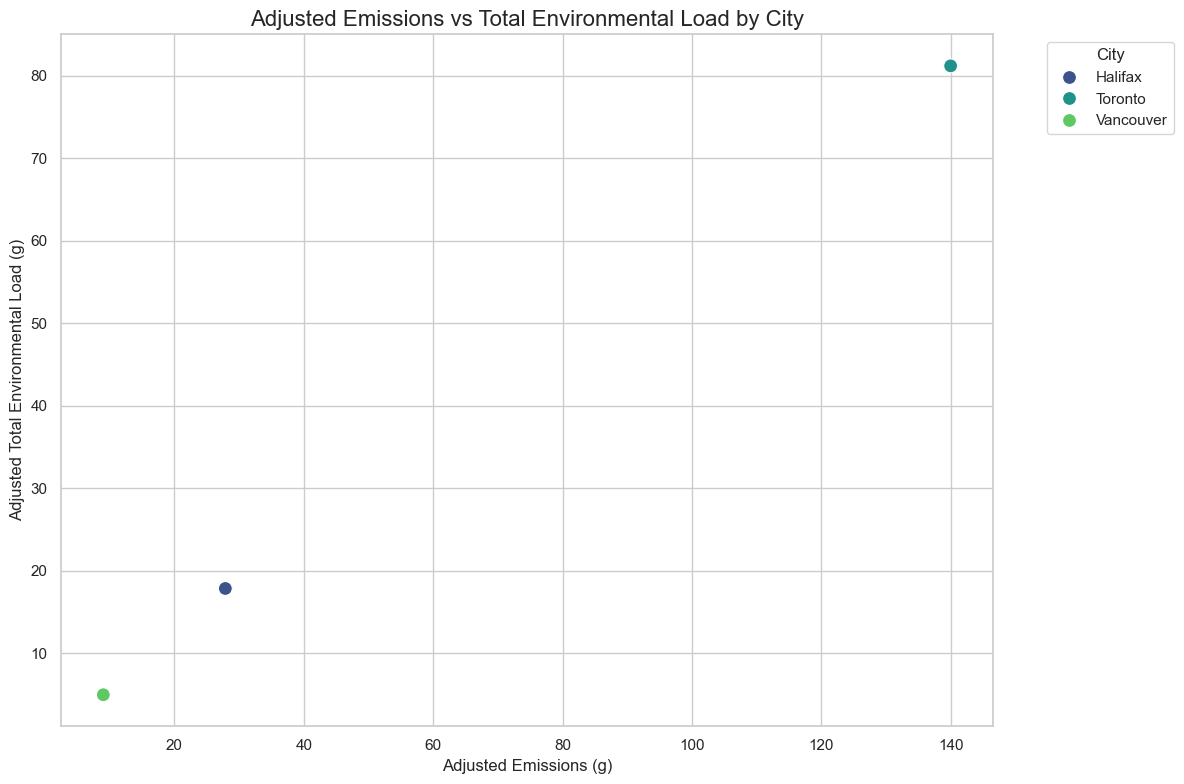

In [21]:
# 📦 Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🎨 Set up plotting styles
%matplotlib inline

# 📂 Load emissions data
emissions_data = pd.read_csv("../data/microplastics_sources.csv")

# Drop rows where the 'City' column is missing, since we can't match them
emissions_data = emissions_data.dropna(subset=['City'])

# Preview emissions data
print("Emissions Data Columns:", emissions_data.columns)
print(emissions_data.head())

# 📂 Load city data
city_data = pd.read_csv("../data/city_data.csv")

# Preview city data
print("City Data Columns:", city_data.columns)
print(city_data.head())

# 🔗 Merge emissions and city data based on 'City'
df = pd.merge(emissions_data, city_data, on="City", how="left")

# 👥 Apply population-based scaling
df['Population_Emission_Factor'] = df['Population'] / df['Population'].max()
df['Adjusted_Emission_g'] = df['Estimated_Emission_g_per_person_per_day'] * df['Population_Emission_Factor']

# 💧 Estimate how emissions split between wastewater and stormwater (assume 60/40)
df['To_Wastewater_g'] = df['Adjusted_Emission_g'] * 0.6
df['To_Stormwater_g'] = df['Adjusted_Emission_g'] * 0.4

# ♻️ Adjust emissions based on treatment efficiency
df['Adjusted_Removed_in_Treatment_g'] = df['To_Wastewater_g'] * df['Treatment_Efficiency']
df['Adjusted_Released_from_Wastewater_g'] = df['To_Wastewater_g'] * (1 - df['Treatment_Efficiency'])

# 🌍 Total environmental load = stormwater + untreated wastewater
df['Adjusted_Total_Environmental_Load_g'] = df['To_Stormwater_g'] + df['Adjusted_Released_from_Wastewater_g']

# 📝 Preview relevant results
print(df[['City', 'Source', 'Adjusted_Emission_g', 'Adjusted_Total_Environmental_Load_g']])

# 📊 Visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Adjusted_Emission_g', y='Adjusted_Total_Environmental_Load_g', hue='City', palette="viridis", s=100)

# 🖌️ Customize plot
plt.title("Adjusted Emissions vs Total Environmental Load by City", fontsize=16)
plt.xlabel("Adjusted Emissions (g)", fontsize=12)
plt.ylabel("Adjusted Total Environmental Load (g)", fontsize=12)
plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# 🚀 Show plot
plt.show()
